# Introducción al análisis predictivo con Regresión

## Ejercicio de Mínimos Cuadrados Ordinarios


1. Construir una regresión lineal simple para predecir la variable "SALES" con base al variable "TV" calculando de forma manual: Beta, Alfa, construir la ecuacion, calcular el SMC(Sumatoria de la distancias al cuadrado), SRC(Sumatoria de los residuos al cuadrado), SCT(Sumatoria de los totales al cuadrado) , R2.
2. Realizar una gráfica donde se puedan ver los valores reales vs los predichos.

## Mínimos Cuadrados Ordinarios

### 1. Preparación de datos en python

### 1.1. Lectura de datos
Primero procedemos a leer los datos usando la función `read_csv` del paquete `pandas.`

In [2]:
import pandas as pd

# Leemos los datos:

data = "D://Coderhouse//8. Introducción a la Regresión//CORRELACION_VENTAS.csv"
datos = pd.read_csv(data)
datos

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### 1.2. Definición de variables
Se crean los objetos de Python que contienen nuestras matrices de valores para los ejes X y Y.

In [3]:
# Definir variables de analisis
x = datos["TV"]

y = datos["Sales"]

### 2. Uso de paquete estadístico integrado de Python

In [4]:
# Usamos la librería statsmodels para construir un modelo de regresión por mínimos cuadrados ordinarios
import statsmodels.api as sm

x_new = sm.add_constant(x)
mod = sm.OLS(y, x_new)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           7.93e-74
Time:                        06:04:00   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

### 3. Construcción del modelo 'a mano' (Aproximación de 'fuerza bruta')

En MCO (Mínimos cuadrados ordinarios) los estimadores de la regresión lineal se pueden describir como :

$$y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + e$$

dónde el estimador de la variable y será $\hat y$:

$$\hat y =\hat β_0 +\hat β_1X_1 +\hat β_2X_2 + ... +\hat β_nX_n + \hat e$$

De esta manera podemos determinar que si la regresión de nuestro interés fuera de la forma:

$$y = β_0 + β_1X + e  ----->  y = \alpha + βX + e  $$

+ $β_0$ es la altura a la que la recta corta al eje Y, la cual se denomina intercepto o alfa.

+ $β_1$ es el incremento que se produce en la variable $y$ cuando la variable $X$ aumenta una unidad, el cual se denomina pendiente de la recta o beta.


Al aplicar la derivación parcial e igualar a cero cada uno de los terminos de la ecuación se tiene que por MCO:

$$\alpha = \bar{y} - β\bar{x} $$

$$\beta = \frac {Cov{x,y}}{var(x)} $$

### Fórmulas de utilidad:

+ Media

$$\bar{x} = \frac{\sum_{i=1}^{N} x_{i}}{N}$$

$$\bar{y} = \frac{\sum_{i=1}^{N} y_{i}}{N}$$

+ Varianza

$$\sigma_{x}^{2} = \frac{\sum (x_{i} - \bar{x})^{2}}{N}$$

$$\sigma_{y}^{2} = \frac{\sum (y_{i} - \bar{y})^{2}}{N}$$

+ Covarianza

$$Cov_{x,y} = \frac{\sum (x_{i} - \bar{x}) (y_{i} - \bar{y}) }{N}$$

+ Suma de cuadrados explicada por la regresión SMC

$$SMC =\sum (\hat{y}_{i} - \bar{y})^{2}$$

+ Suma de cuadrados de los errores o residuos SRC

$$SRC =\sum (y_{i} - \hat{y})^{2}$$

+ Suma de cuadrados totales

$$STC =\sum (y_{i} - \bar{y})^{2} = SMC + SRC $$


+ Coeficiente de determinación $R^{2}$

$$R^{2} =  \frac{SMC}{STC}$$

### 3.1. Creación de Variables auxiliares

In [5]:
# Auxiliares
N = len(x)
x_barra = x.mean()
y_barra = y.mean()
var_x = sum((x - x_barra) ** 2) / N
var_y = sum((y - y_barra) ** 2) / N
cov_x_y = sum((x - x_barra) * (y - y_barra)) / N

# Mínimos cuadrados ordinarios
beta = cov_x_y / var_x
alfa = y_barra - beta * x_barra

# Ecuación de regresión
y_gorro = alfa + (beta * x)

# Errores
SMC = sum((y_gorro - y_barra) ** 2)
STC = sum((y - y_barra) ** 2)
SRC = sum((y - y_barra) ** 2)

# R cuadrado
R2 = SMC / STC

In [8]:
print("El valor del intercepto alfa es de =", round(alfa, 2))
print("El valor de la pendiente beta es de =", round(beta, 4))
print("El valor del coeficiente de determinacion R2 =", str(round(R2, 4) * 100) + "%")
print("La ecuación de regresión sería:")
print("Sales =", str(round(alfa, 4)), "+", str(round(beta, 4)) + " TV")

El valor del intercepto alfa es de = 6.97
El valor de la pendiente beta es de = 0.0555
El valor del coeficiente de determinacion R2 = 81.22%
La ecuación de regresión sería:
Sales = 6.9748 + 0.0555 TV


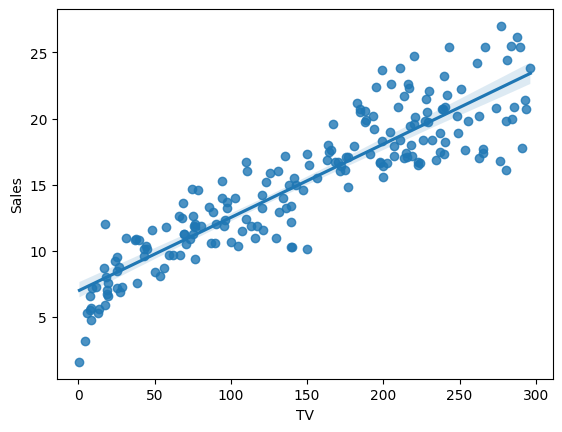

In [9]:
import seaborn as sns

sns.regplot(x="TV", y="Sales", data=datos)

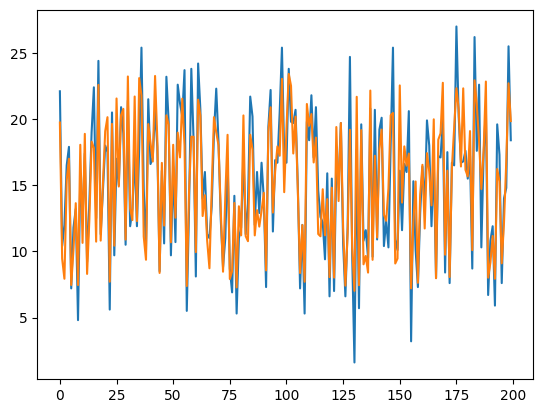

In [10]:
# Gráficas

import matplotlib.pyplot as plt

plt.plot(y)  # Realidad
plt.plot(y_gorro)  # Pronosticado

plt.show()